In [1]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
dat = pd.read_csv("train_dataset02.csv")

#### For checking for value that rises above.

LEVELT1


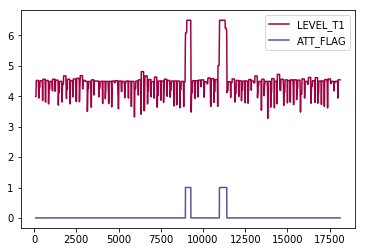

LEVELT2


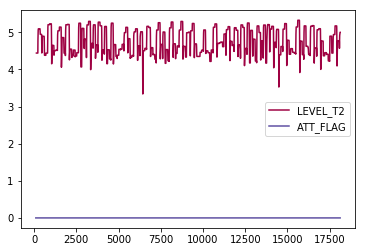

LEVELT3


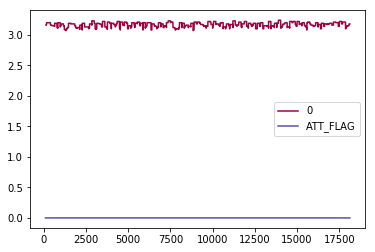

LEVELT4


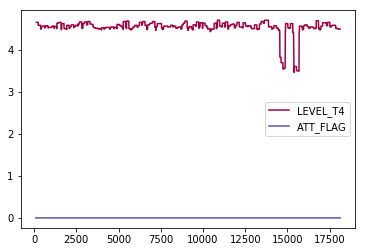

LEVELT5


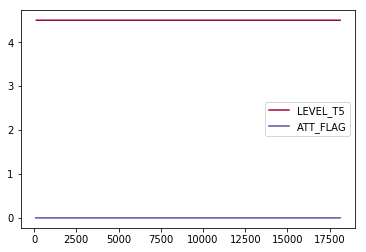

LEVELT6


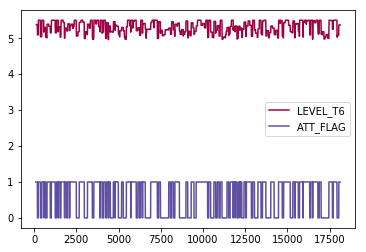

LEVELT7


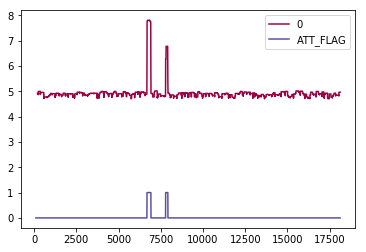

In [2]:
OVERKILLGLOBALJOY=[]
allsets= []
contextual_window = 38
for i in range(len(dat["LEVEL_T1"])):
    OVERKILLGLOBALJOY.append(False)
def overkill(somerolling_max,threshold):
    smallest = 999999
    largest = -999999
    for value in somerolling_max:
        if value<smallest:
            smallest=value
        if value>largest:
            largest = value
    completeRange = largest-smallest
    threshold = 2.0*somerolling_max.std()+ somerolling_max.mean()
    #limit = threshold+smallest
    limit = threshold
    ans=[]
    for i in range(len(somerolling_max)):
        if somerolling_max[i]>limit:
            ans.append(True)
            OVERKILLGLOBALJOY[i]= True
        else:
            ans.append(False)
    #, min_periods=1
    somerolling_max = pd.DataFrame(somerolling_max)
    holdingSeries = pd.Series(data = ans)
    somerolling_max = somerolling_max.assign(ATT_FLAG=holdingSeries)
    #somerolling_max.rolling(1).max().plot.line(colormap = "rainbow")#,subplots = True)
    somerolling_max.rolling(100).max().plot.line(colormap = "Spectral")
    a = somerolling_max.rolling(100).max()["ATT_FLAG"]

    plt.show()
    allsets.append(ans)
    return somerolling_max #return the series
    
    
def invertir(somerolledthing):
    mean = somerolledthing.mean()
    resultant=[]
    for counter in range(len(somerolledthing)):
        resultant.append(((somerolledthing[counter]-mean)*(-1))+mean)
    return pd.Series(resultant)



#axes = dat["LEVEL_T1"].rolling(38).max().plot.line(colormap = "rainbow")#,subplots = True)
LEVELT1 = dat["LEVEL_T1"].rolling(contextual_window, min_periods=1).max()
print("LEVELT1")
LEVELT1_mod = overkill(LEVELT1,0.9)
LEVELT2 = dat["LEVEL_T2"].rolling(contextual_window).mean()
print("LEVELT2")
LEVELT2_mod = overkill(LEVELT2,0.9)
LEVELT3 = dat["LEVEL_T3"].rolling(contextual_window).min()
print("LEVELT3")
LEVELT3_mod = overkill(invertir(LEVELT3),0.9)

LEVELT4 = dat["LEVEL_T4"].rolling(contextual_window).max()
print("LEVELT4")
LEVELT4_mod = overkill(LEVELT4,0.9)
LEVELT5 = dat["LEVEL_T5"].rolling(contextual_window).max()
print("LEVELT5")
LEVELT5_mod = overkill(LEVELT5,0.9)
LEVELT6 = dat["LEVEL_T6"].rolling(contextual_window).min()#### IS PRETTY MUCH USELESS IGNORE
print("LEVELT6")
LEVELT6_mod =overkill(LEVELT6,0.9)
LEVELT7 = dat["LEVEL_T7"].rolling(100).max()####
print("LEVELT7")
LEVELT7_mod = overkill(invertir(LEVELT7),0.9)

FLOW_PU1


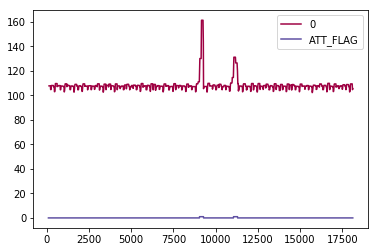

FLOW_PU3


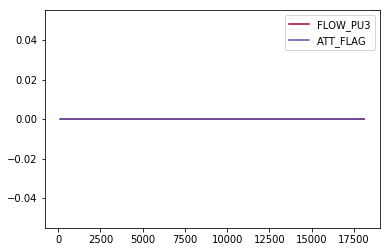

FLOW_PU4


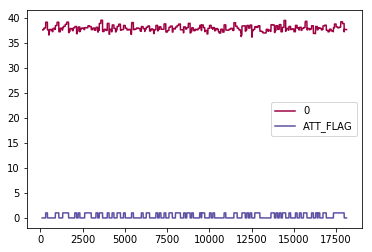

In [3]:
FLOW_PU1 = dat["FLOW_PU1"].rolling(contextual_window).mean()
print("FLOW_PU1")
FLOWPU1_mod = overkill(invertir(FLOW_PU1),0.4)
#FLOW_PU2 = dat["FLOW_PU2"].rolling(contextual_window).mean() ### OVER SENSITIVE???
#print("FLOW_PU2")
#FLOWPU2_mod = overkill(invertir(FLOW_PU2),0.6)
FLOW_PU3 = dat["FLOW_PU3"].rolling(contextual_window).max()
print("FLOW_PU3")
FLOWPU3_mod = overkill(FLOW_PU3,0.9)
FLOW_PU4 = dat["FLOW_PU4"].rolling(contextual_window).max()
print("FLOW_PU4")
FLOWPU4_mod = overkill(invertir(FLOW_PU4),0.9)

FLOW_PU5


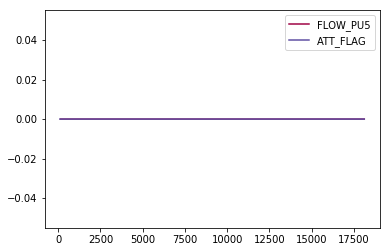

LOW_PU6


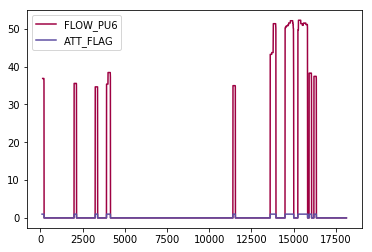

FLOW_PU7


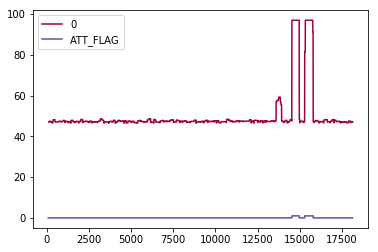

In [4]:
FLOW_PU5 = dat["FLOW_PU5"].rolling(contextual_window).max()
print("FLOW_PU5")
FLOWPU5_mod = overkill(FLOW_PU5,0.9)
FLOW_PU6 = dat["FLOW_PU6"].rolling(contextual_window).max()
print("LOW_PU6")
FLOWPU6_mod = overkill(FLOW_PU6,0.9)
FLOW_PU7 = dat["FLOW_PU7"].rolling(contextual_window).max()
print("FLOW_PU7")
FLOWPU7_mod = overkill(invertir(FLOW_PU7),0.9)
# FLOW_PU8 = dat["FLOW_PU8"].rolling(300).max() #noisy and useless
# print("FLOW_PU8")
# FLOWPU8_mod = overkill(FLOW_PU8,0.9)

FLOW_PU10


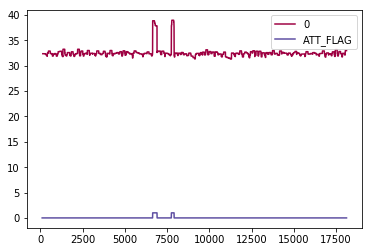

FLOW_PU11


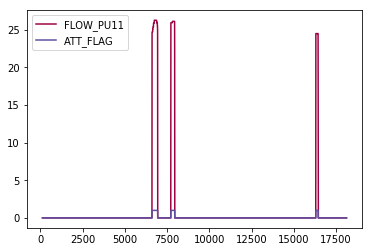

In [5]:
# FLOW_PU9 = dat["FLOW_PU9"].rolling(contextual_window).max() # USELESS
# print("FLOW_PU9")
# overkill(FLOW_PU9,0.9)
FLOW_PU10 = dat["FLOW_PU10"].rolling(contextual_window).max()
print("FLOW_PU10")
FLOWPU10_mod = overkill(invertir(FLOW_PU10),0.9)
FLOW_PU11 = dat["FLOW_PU11"].rolling(contextual_window).max()
print("FLOW_PU11")
FLOWPU11_mod = overkill(FLOW_PU11,0.8)
#FLOW_V2 = dat["FLOW_V2"].rolling(contextual_window).max()
#print("FLOW_V2")
#FLOWV2_mod = overkill(invertir(FLOW_V2),0.9)

PRESSUREJ269


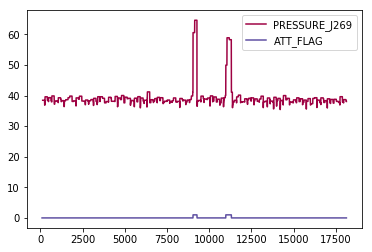

PRESSUREJ422


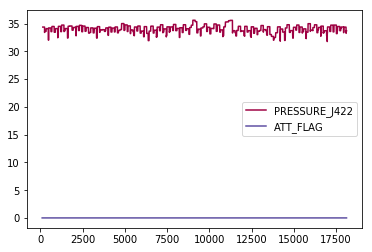

PRESSUREJ302


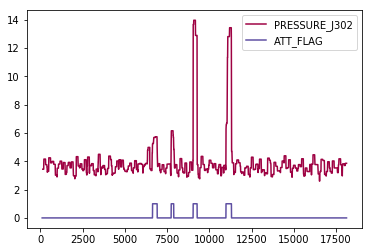

PRESSUREJ317


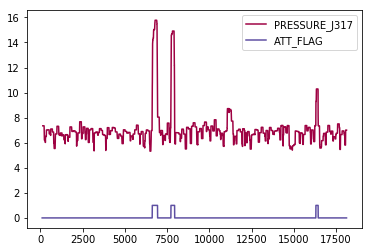

In [6]:
PRESSUREJ269 = dat["PRESSURE_J269"].rolling(contextual_window).max()
print("PRESSUREJ269")
PRESSUREJ269_mod = overkill(PRESSUREJ269,0.9)
# PRESSUREJ306 = dat["PRESSURE_J306"].rolling(contextual_window).max() #useless
# print("PRESSUREJ306")
# PRESSUREJ306_mod = overkill(PRESSUREJ306,0.9)
# PRESSUREJ14 = dat["PRESSURE_J14"].rolling(contextual_window).max()#useless
# print("PRESSUREJ14")
# PRESSUREJ14_mod = overkill(PRESSUREJ14,0.9)
PRESSUREJ422 = dat["PRESSURE_J422"].rolling(contextual_window).max()
print("PRESSUREJ422")
PRESSUREJ422_mod = overkill(PRESSUREJ422,0.9)
PRESSUREJ302 = dat["PRESSURE_J302"].rolling(contextual_window).std()
print("PRESSUREJ302")
PRESSUREJ302_mod = overkill(PRESSUREJ302,0.6)
PRESSUREJ317 = dat["PRESSURE_J317"].rolling(contextual_window).std()
print("PRESSUREJ317")
PRESSUREJ317_mod = overkill(PRESSUREJ317,0.6)

PRESSUREJ300


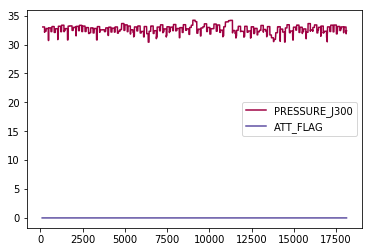

PRESSUREJ256


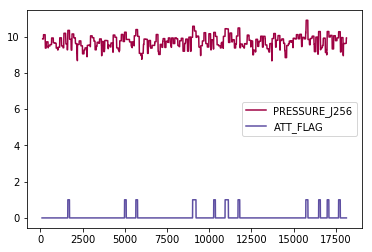

PRESSUREJ289


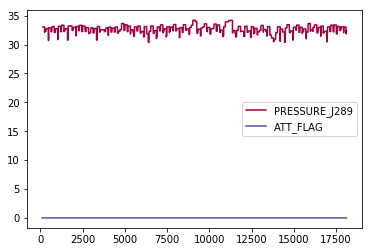

PRESSUREJ415


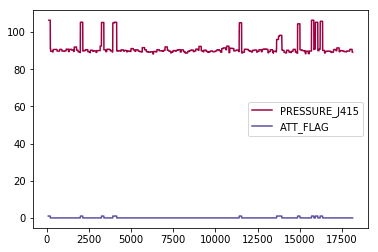

In [7]:
# PRESSUREJ280 = dat["PRESSURE_J280"].rolling(contextual_window).max() #useless
# print("PRESSUREJ280")
# PRESSUREJ280_mod = overkill(PRESSUREJ280,0.9)
PRESSUREJ300 = dat["PRESSURE_J300"].rolling(contextual_window).max()
print("PRESSUREJ300")
PRESSUREJ300_mod = overkill(PRESSUREJ300,0.9)
PRESSUREJ256 = dat["PRESSURE_J256"].rolling(contextual_window).std()
print("PRESSUREJ256")
PRESSUREJ256_mod = overkill(PRESSUREJ256,0.6)
PRESSUREJ289 = dat["PRESSURE_J289"].rolling(contextual_window).max()
print("PRESSUREJ289")
PRESSUREJ289_mod = overkill(PRESSUREJ289,0.9)
PRESSUREJ415 = dat["PRESSURE_J415"].rolling(contextual_window).max()
print("PRESSUREJ415")
PRESSUREJ415_mod = overkill(PRESSUREJ415,0.9)

False    14484
True      3639
dtype: int64

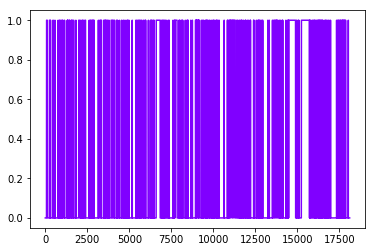

In [8]:
OVERKILLGLOBALJOY = pd.Series(OVERKILLGLOBALJOY)
OVERKILLGLOBALJOY.rolling(1).max().plot.line(colormap = "rainbow")#,subplots = True)
OVERKILLGLOBALJOY.to_csv("testedburst.csv")
OVERKILLGLOBALJOY.value_counts()

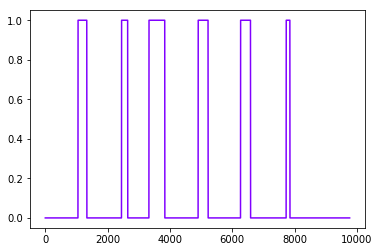

In [9]:
eyeball = pd.read_csv("eyeball.csv")
eyeball["ATT_FLAG"].value_counts()
eyeball["ATT_FLAG"].rolling(1).max().plot.line(colormap = "rainbow")#,subplots = True)

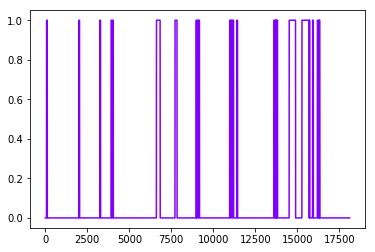

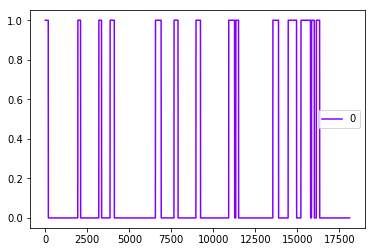

In [10]:
underkillall =[] 
for i in range(len(dat["LEVEL_T1"])):
    underkillall.append(False)
for counter in range(len(dat["LEVEL_T1"])):
    changecount=0
    for set_ in allsets:
        if set_[counter]:
            changecount+=1
    if changecount>=2: #check if they have appeared in 2 or more
        underkillall[counter] = True    
    elif counter+1<len(dat["LEVEL_T1"]-1) and counter>0:
        for set_ in allsets:
            if set_[counter-1] or set_[counter+1]:
                changecount+=1
        if changecount>=4: # check if they have appeared in 2 or more in their recent
            underkillall[counter-1] = True
    counter += 1
underkiller = pd.Series(underkillall)
underkiller.rolling(1).max().plot.line(colormap = "rainbow")#,subplots = True)
new_underkiller = underkiller.rolling(200,min_periods = 1, center = True).mean()
listy = []
for i in new_underkiller:
    if i>0.2:
        listy.append(True)
    else:
        listy.append(False)
new_list = pd.DataFrame(listy)
new_list.rolling(1).max().plot.line(colormap = "rainbow")
nonsense = pd.Series(listy)

In [11]:
def calc_values(gold_set,trial_set):
    TN = 0
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(gold_set)):
        if trial_set[i]:
            if gold_set[i]:
                TP+=1
            else:
                FP+=1
        else:
            if gold_set[i]:
                FN+=1
            else:
                TN+=1

    p = TP/(TP+FP)
    r = TP/(TP+FN)
    return 2*(p*r)/(p+r)


logreg = pd.read_csv("logreg0.6.csv")
print("SHAUN SCORE")
print(calc_values(dat["ATT_FLAG"],OVERKILLGLOBALJOY))
print("underkiller")
print(calc_values(dat["ATT_FLAG"],underkiller))
print("smoothed")
print(calc_values(dat["ATT_FLAG"],nonsense))

SHAUN SCORE
0.5735687533440342
underkiller
0.6859733064719215
smoothed
0.6284935241990457


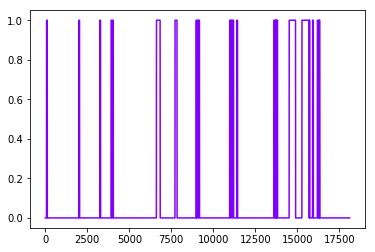

In [31]:
#LEVELT1_mod,
#LEVELT2_mod
#LEVELT3_mod
#LEVELT7_mod
#FLOWPU1_mod,FLOWPU3_mod,FLOWPU4_mod,FLOWPU5_mod,FLOWPU6_mod,FLOWPU7_mod,FLOWPU10_mod,FLOWPU11_mod
#PRESSUREJ415_mod,PRESSUREJ289_mod,PRESSUREJ256_mod,PRESSUREJ300_mod,PRESSUREJ317_mod,PRESSUREJ302_mod,
#PRESSUREJ422_mod,PRESSUREJ269_mod
testset = pd.read_csv("test_dataset.csv")
anskey = pd.read_csv("eyeball.csv")
datastuff1 = pd.concat([LEVELT1, PRESSUREJ269,PRESSUREJ302,PRESSUREJ422,PRESSUREJ300,PRESSUREJ289,FLOW_PU1,FLOW_PU3], axis=1)
datastuff1 = datastuff1.fillna(0)
model_T1 = LogisticRegression().fit(datastuff1,dat["ATT_FLAG"])
hold = testset[["LEVEL_T1","PRESSURE_J269","PRESSURE_J302","PRESSURE_J422","PRESSURE_J300","PRESSURE_J289","FLOW_PU1","FLOW_PU3"]]
output = model_T1.predict(hold)
tank1 =output
datastuff2 = pd.concat([LEVELT2, PRESSUREJ300,PRESSUREJ289,PRESSUREJ269,PRESSUREJ302,FLOW_PU1,FLOW_PU3,FLOW_PU5,FLOW_PU4,FLOW_PU6,FLOW_PU7], axis=1)
datastuff2 = datastuff2.fillna(0)
model_T2 = LogisticRegression().fit(datastuff2,dat["ATT_FLAG"])
hold = testset[["LEVEL_T2","PRESSURE_J300","PRESSURE_J289","PRESSURE_J269","PRESSURE_J302","FLOW_PU1","FLOW_PU3","FLOW_PU5","FLOW_PU4","FLOW_PU6","FLOW_PU7"]]
output = model_T2.predict(hold)
tank2 =output
datastuff3 = pd.concat([LEVELT3,PRESSUREJ256,PRESSUREJ300,FLOW_PU5,FLOW_PU4], axis=1)
datastuff3 = datastuff3.fillna(0)
model_T3 = LogisticRegression().fit(datastuff3,dat["ATT_FLAG"])
hold = testset[["LEVEL_T3","PRESSURE_J256","PRESSURE_J300","FLOW_PU4","FLOW_PU5"]]
output = model_T3.predict(hold)
tank3 =output
# datastuff4 = pd.concat([LEVELT4,PRESSUREJ415,PRESSUREJ289,FLOW_PU6,FLOW_PU7], axis=1)
# datastuff4 = datastuff4.fillna(0)
# model_T4 = LogisticRegression().fit(datastuff4,dat["ATT_FLAG"])
# datastuff5 = pd.concat([LEVELT5,PRESSUREJ306,PRESSUREJ302,FLOW_PU8,FLOW_PU9], axis=1)
# datastuff5 = datastuff5.fillna(0)
# model_T5 = LogisticRegression().fit(datastuff5,dat["ATT_FLAG"])
# datastuff6 = pd.concat([LEVELT6,PRESSUREJ307,PRESSUREJ317,FLOW_PU11,FLOW_PU10], axis=1)
# datastuff6 = datastuff36.fillna(0)
# model_T6 = LogisticRegression().fit(datastuff6,dat["ATT_FLAG"])
datastuff7 = pd.concat([LEVELT7,PRESSUREJ317,FLOW_PU11,FLOW_PU10],axis =1)
datastuff7 = datastuff7.fillna(0)
model_T7 = LogisticRegression().fit(datastuff7,dat["ATT_FLAG"])
hold = testset[["PRESSURE_J317","LEVEL_T7","FLOW_PU11","FLOW_PU10"]]
output = model_T7.predict(hold)
tank7 = output
set_=[]
set_.append(tank1)
set_.append(tank2)
set_.append(tank3)
set_.append(tank7)
underkillall =[] 
for i in range(len(dat["LEVEL_T1"])):
    underkillall.append(False)
for counter in range(len(dat["LEVEL_T1"])):
    changecount=0
    for set_ in allsets:
        if set_[counter]:
            changecount+=1
    if changecount>=2: #check if they have appeared in 2 or more
        underkillall[counter] = True    
    elif counter+1<len(dat["LEVEL_T1"]-1) and counter>0:
        for set_ in allsets:
            if set_[counter-1] or set_[counter+1]:
                changecount+=1
        if changecount>=4: # check if they have appeared in 2 or more in their recent
            underkillall[counter-1] = True
    counter += 1
underkiller = pd.Series(underkillall)
underkiller.rolling(1).max().plot.line(colormap = "rainbow")#,subplots = True)

#.rolling(1).max().plot.line(colormap = "rainbow")#,subplots = True)
